In [109]:
from __future__ import print_function
__author__ = "Sung Hoon Yang, CUSP NYU 2018"
import numpy as np
import pandas as pd
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 88}

matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
np.random.seed(999)

"""
Set up PUIDATA env var
"""
import os
os.environ["PUIDATA"] = "%s/fall18/PUI/PUIDATA"% os.getenv("HOME")

In [110]:
import random

## Assignment 1: Write an ipython notebook that demonstrates visually in a data-driven way the Central Limit Theorem.
##### A skeleton notebook is here

GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), all with the same population mean
Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.
For each sample PLOT the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
DESCRIBE (in a caption to your figure) the behavior you see in the plots in terms of the law of large numbers or Central Limit Theorem.
PLOT the distributions of all sample means (together for all distributions).
Mandatory: as a histogram. Optional: in any other way you think is convincing
Extra Credit: FIT a gaussian to the distribution of means

In [111]:
__MEAN__ = 1
__SIGMA__ = 1
__DISTRIBUTIONS__ = {
    'normal': np.random.normal
    , 'poisson': np.random.poisson
    , 'binomial': np.random.binomial
    , 'chisquare': np.random.chisquare
    , 'exponential': np.random.exponential
}

__RETURN_SAMPLES__ = {
    'normal': None
    , 'poisson': None
    , 'binomial': None
    , 'chisquare': None
    , 'exponential': None
}
for d, fnc in __DISTRIBUTIONS__.items():
    mat_n = np.random.randint(10, 2000, 100)
    dist_fnc = __DISTRIBUTIONS__[d]
    if d == 'normal':
        l = lambda x: dist_fnc(__MEAN__, __SIGMA__, x) # mu, sig, n
    elif d == 'poisson':
        l = lambda x: dist_fnc(__MEAN__, x) # lambda, n; in Poisson, lamdba = MEAN = VARIANCE
    elif d == 'binomial':
#         since mean = np let's make n = 10 and p = .1
        l = lambda x: dist_fnc(10, .1, x) # n, p, n where mean = np and var = np*(1-p)
    elif d == 'chisquare':
        l = lambda x: dist_fnc(__MEAN__, x) # degree of freedom defaults to x - 1, n
    elif d == 'exponential':
        l = lambda x: dist_fnc(__MEAN__, x) # mu, sig, n
    __RETURN_SAMPLES__[d] = map(l, mat_n)
    

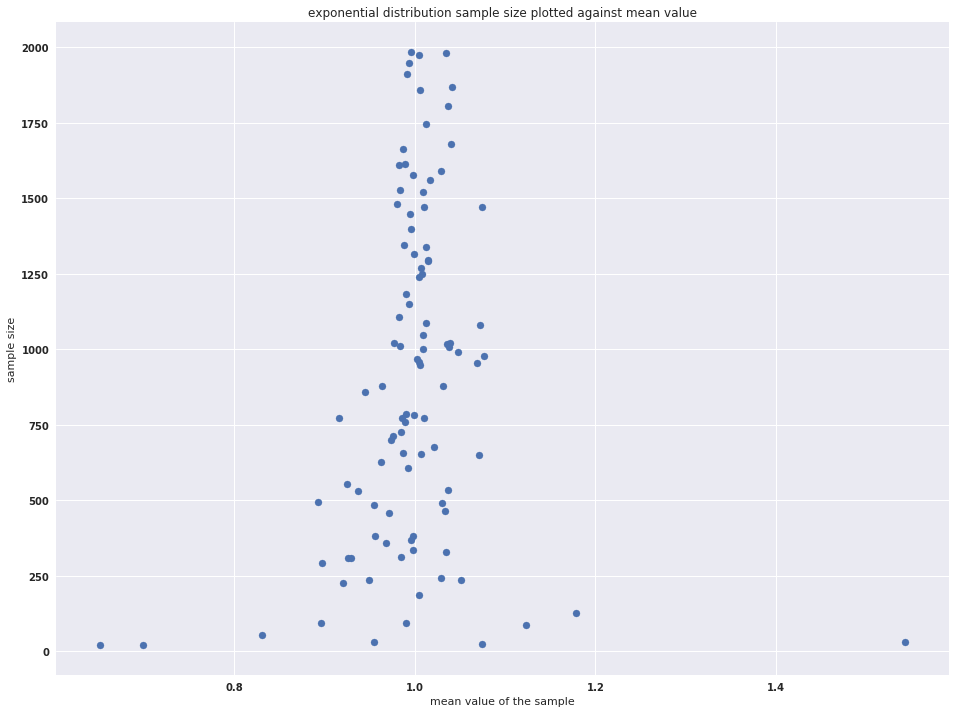

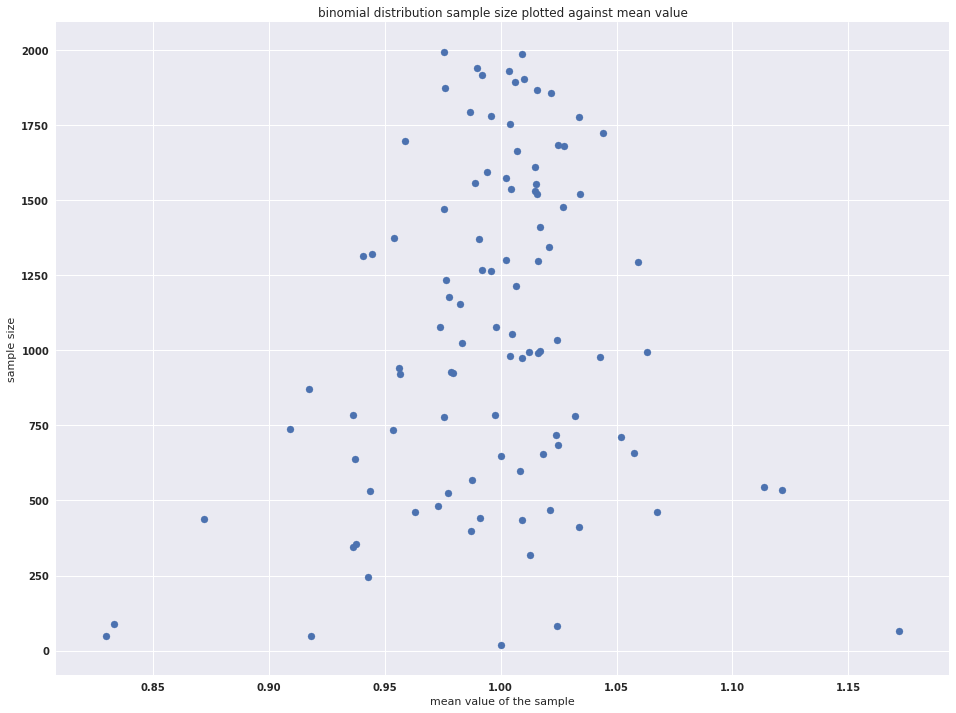

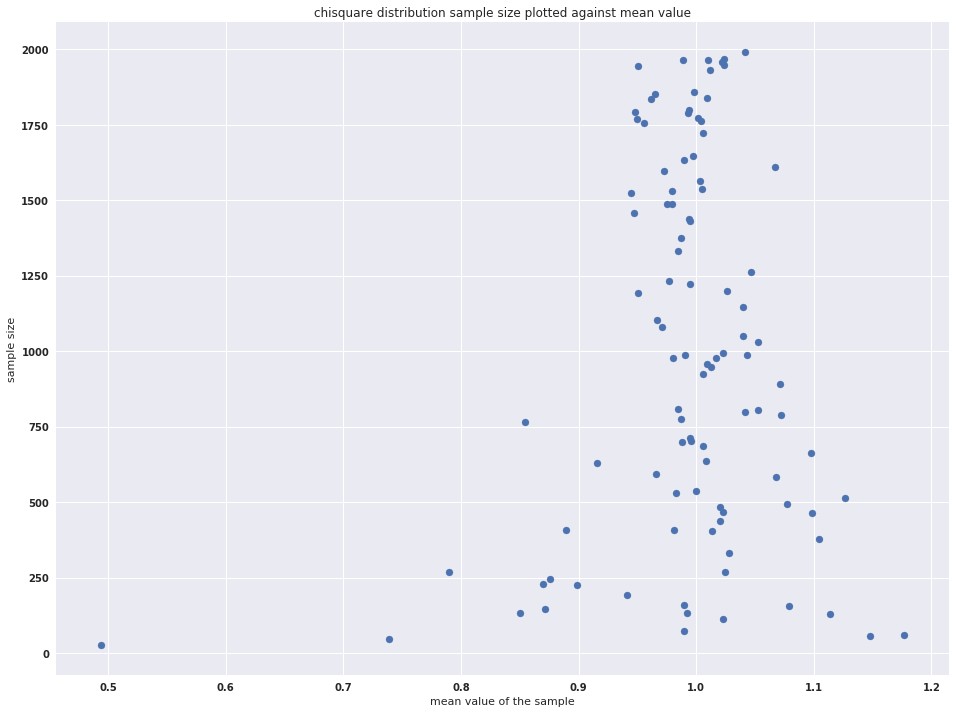

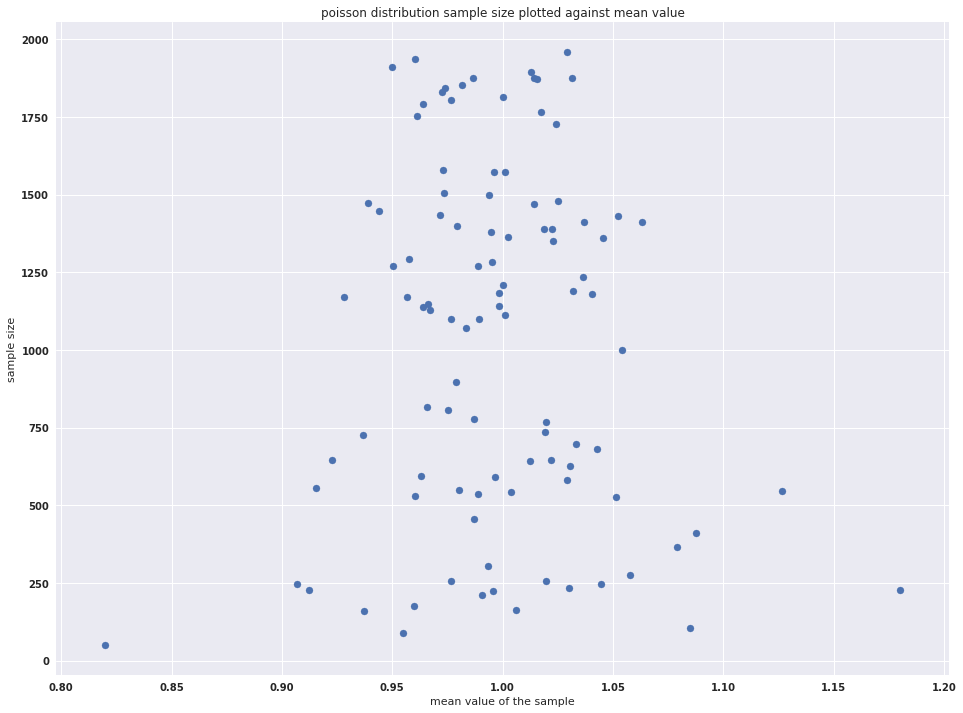

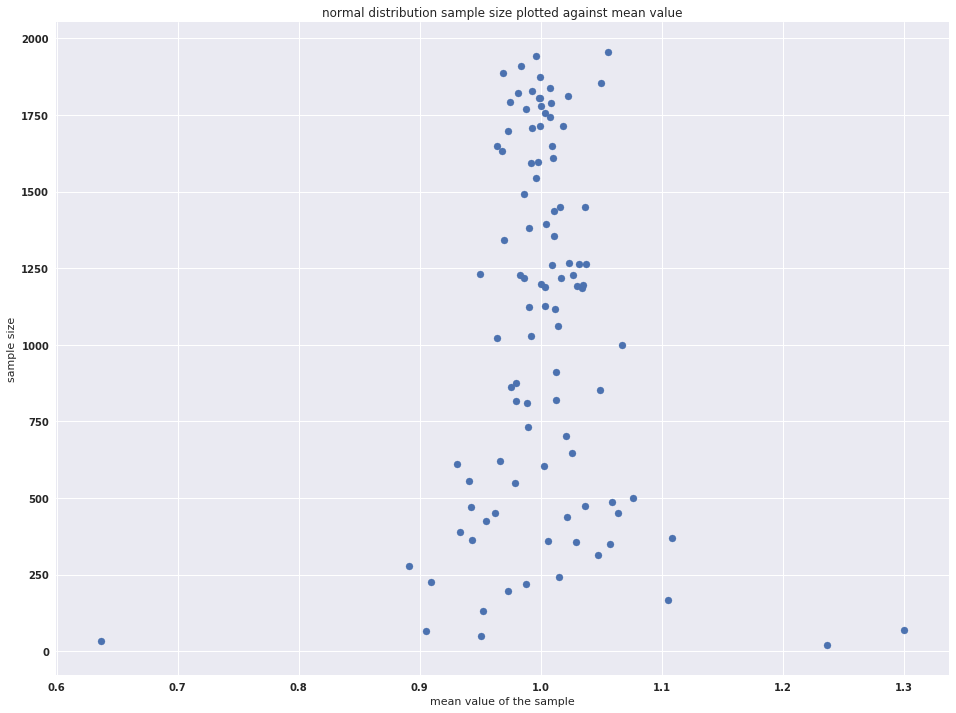

In [112]:
for d, dat in __RETURN_SAMPLES__.items():
    calc_mean = lambda x: x.mean()
    calc_size = lambda x: len(x)
    fig = plt.figure(figsize=(16,12))
    kw = dict(
    xlabel='mean value of the sample'
    , ylabel = 'sample size'
    , title = '%s distribution sample size plotted against mean value' % d
    )
    ax = fig.gca(**kw)
    ax = plt.scatter(map(calc_mean, dat), map(calc_size, dat))
    

#### CAPTION
* the above array of graphs show sum of samples of each distribution from exponential to normal distribution.
* when the sample is large enough (as stated in CLT) all distributions tend to Normal distributions.

In [113]:
# flush
plt.clf()
plt.cla()
plt.close()

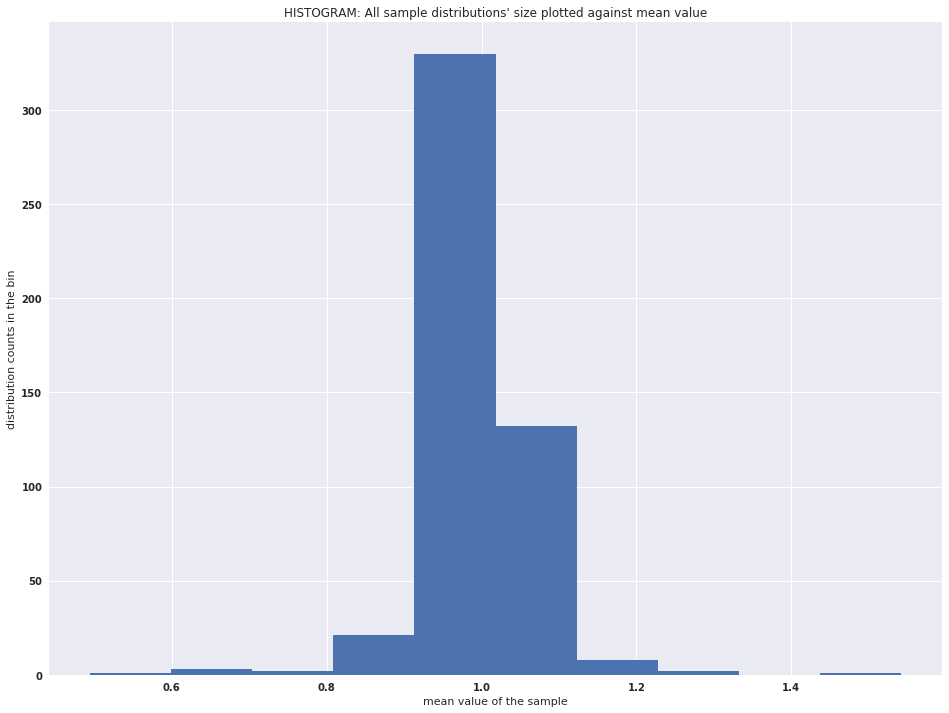

In [114]:
# I will plot everything in one chart this time
calc_mean = lambda x: x.mean()
calc_size = lambda x: len(x)
_xs = []
_ys = []
for d, dat in __RETURN_SAMPLES__.items():
    _xs += list(map(calc_mean, dat))
    _ys += list(map(calc_size, dat))

_xs = np.asarray(_xs)
_ys = np.asarray(_ys)
fig = plt.figure(figsize=(16,12))
kw = dict(
    xlabel='mean value of the sample'
    , ylabel = 'distribution counts in the bin'
    , title = 'HISTOGRAM: All sample distributions\' size plotted against mean value'
)
ax = fig.gca(**kw)
ax = plt.hist(_xs)


#### CAPTION 
* the histogram' shape is of the normal distribution where N ~ (1, SD(_xs))

In [115]:
# flush
plt.clf()
plt.cla()
plt.close()

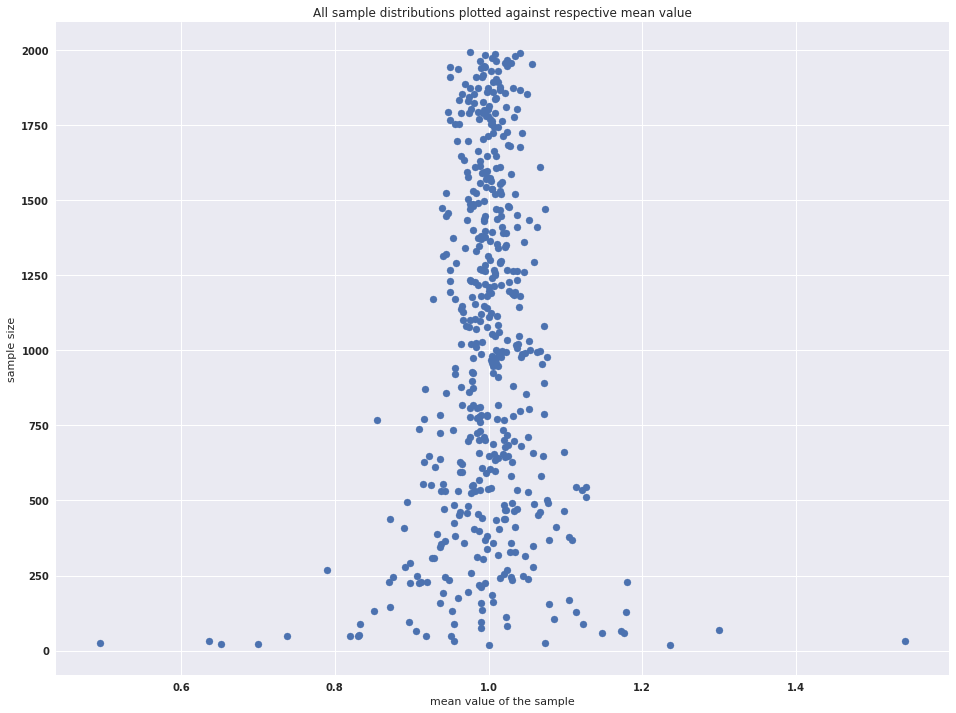

In [116]:
# all in scatter plot
fig = plt.figure(figsize=(16,12))
kw = dict(
    xlabel='mean value of the sample'
    , ylabel = 'sample size'
    , title = 'All sample distributions plotted against respective mean value'
)
ax = fig.gca(**kw)
ax = plt.scatter(_xs, _ys)

#### CAPTION 
* the scatterplot, like the previous histogram, is of the normal distribution shape where N ~ (1, SD(_xs))

In [117]:
# flush
plt.clf()
plt.cla()
plt.close()

(array([ 0.01908153,  0.05724459,  0.03816306,  0.4007121 ,  6.29690437,
         2.51876175,  0.15265223,  0.03816306,  0.        ,  0.01908153]),
 array([ 0.49408182,  0.59889522,  0.70370863,  0.80852204,  0.91333544,
         1.01814885,  1.12296226,  1.22777567,  1.33258907,  1.43740248,
         1.54221589]),
 <a list of 10 Patch objects>)

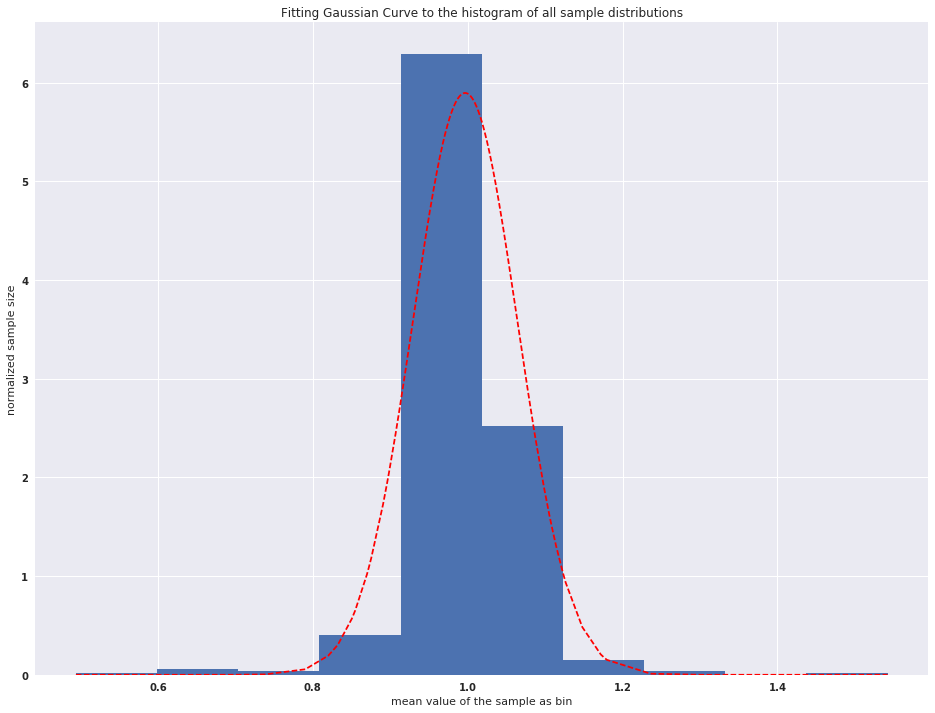

In [125]:
# Fitting a Gaussian to my entire distribution
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from sklearn.preprocessing import normalize
import scipy.stats as stats
import pylab as pl

fig = plt.figure(figsize=(16,12))
kw = dict(
    xlabel='mean value of the sample as bin'
    , ylabel = 'normalized sample size'
    , title = 'Fitting Gaussian Curve to the histogram of all sample distributions'
)
ax = fig.gca(**kw)
# fit gaussian line
_xs_sorted = sorted(_xs) # sorting is necessary for the curve plotting.. it has to be plotted in sequence
fit = stats.norm.pdf(_xs_sorted, np.mean(_xs), np.std(_xs))  #this is a fitting indeed
plt.plot(_xs_sorted, fit, '--r')
plt.hist(_xs, normed=True)


#### CAPTION
* When a histogram is normalized, the total area covered by the hist. is equal to one. 
* The gaussian curve is also normalized to fit the normalized histogram.

In [105]:
# flush
plt.clf()
plt.cla()
plt.close()

In [ ]:
#End of Notebook